<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-dataset" data-toc-modified-id="load-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load dataset</a></span></li><li><span><a href="#analysis-the-sales-change-of-coca-cola-from-2016-to-2019" data-toc-modified-id="analysis-the-sales-change-of-coca-cola-from-2016-to-2019-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>analysis the sales change of coca-cola from 2016 to 2019</a></span></li><li><span><a href="#analysis-the-coca-cola-percent-compared-with-the-market" data-toc-modified-id="analysis-the-coca-cola-percent-compared-with-the-market-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>analysis the coca-cola percent compared with the market</a></span></li><li><span><a href="#analysis-pack_" data-toc-modified-id="analysis-pack_-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>analysis pack_</a></span></li><li><span><a href="#the-sales-situation-of-each-brand-distributed-in-one-channel" data-toc-modified-id="the-sales-situation-of-each-brand-distributed-in-one-channel-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>the sales situation of each brand distributed in one channel</a></span></li><li><span><a href="#analysis-the-p-value" data-toc-modified-id="analysis-the-p-value-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>analysis the p-value</a></span></li></ul></div>

In [180]:
import pandas as pd
pd.set_option("display.max_columns", 40)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
from scipy.stats import chi2_contingency

### load dataset

In [2]:
data = pd.read_csv("PHILIPPINES_BEVERAGE_PURCHASE_HHP_CLEANED.csv",encoding='utf-16')

In [3]:
data_df = pd.DataFrame(data)

In [120]:
data_df.drop(['REFID'],axis=1).head()

,seqno,house,weekday,trade,channel,Store,Liters_Bought_CORR,Spend_CORR,Price_Per_Liter_CORR,Unit_Size_CORR,CAT,MANUFACTURER,BRAND,PACKSIZE,PACKAGE,FLAVOUR,VARIANT1,VARIANT2,SKU_DESC,CW_1Y,CW_2Y,DEMOG_REGION,DEMOG_HHSIZE,DEMOG_HHSEC,DEMOG_HWAGE,DEMOG_KIDS,DEMOG_WORKINGSTATUS,DEMOG_STRATA,DEMOG_LIFESTAGE,1W Rolling Week End,4W Rolling Week End,Units_Bought_CORR,Packs_Bought_CORR,Units_Per_Pack_CORR,MANUFACTURER_AGG,BRAND_AGG
0,1,101006101,1,MT,SUPERMARKETS,Other,0.27,50.0,185.185185,27.0,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,27.5 G (8- W/ 10% MORE CONTENT),SACHET,BROWN / BROWN COFFEE / BROWN COFFEE MIX,JUST RIGHT BLEND COFFEE MIX,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-07,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged
1,2,101006101,2,MT,SUPERMARKETS,Other,0.50,28.0,56.000000,500.0,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-07,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
2,3,101006101,2,MT,SUPERMARKETS,Other,1.80,60.0,33.333333,300.0,SOFTDRINKS,COCA-COLA,COKE,300 ML (COCA-COLA MISMO P10),PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 300 ML (COCA-COLA MI...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-07,2/28/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
3,4,101006101,2,MT,SUPERMARKETS,Other,0.50,28.0,56.000000,500.0,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-21,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
4,5,101006101,2,MT,SUPERMARKETS,Other,0.25,50.0,200.000000,25.0,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,25 G,SACHET,MORE IN 1,REGULAR/CLASSIC,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-28,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged


In [123]:
data_df['DEMOG_STRATA'].value_counts()

Urban    863634
Rural    369544
Name: DEMOG_STRATA, dtype: int64

In [5]:
#search the brand under the coca-cola
data_df[data_df['MANUFACTURER'] == 'COCA-COLA']['BRAND'].value_counts()

COKE                 138098
ROYAL                 24487
SPRITE                20559
WILKINS               10177
MINUTE MAID            4190
SPARKLE                2002
POP                    1460
WILKINS PURE            443
SARSI                   168
VIVA                    125
WILKINS DELIGHT         103
NUTRI JUICE               5
8 O'CLOCK FUNCHUM         1
Name: BRAND, dtype: int64

In [6]:
res=data_df[data_df['MANUFACTURER'] == 'COCA-COLA']['CAT'].value_counts()

Text(0.5, 1.0, '2016-2019 coca-cola product percent in philippnes')

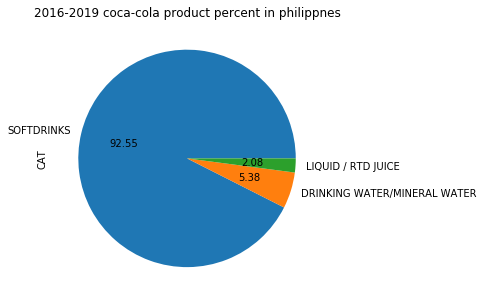

In [7]:
res.plot.pie(figsize=(5,5),autopct='%.2f')
plt.title("2016-2019 coca-cola product percent in philippnes")

In [8]:
res

SOFTDRINKS                      186774
DRINKING WATER/MINERAL WATER     10848
LIQUID / RTD JUICE                4196
Name: CAT, dtype: int64

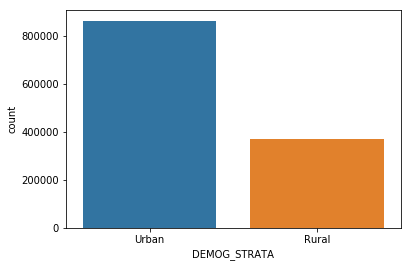

In [9]:
sns.countplot(data_df['DEMOG_STRATA'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

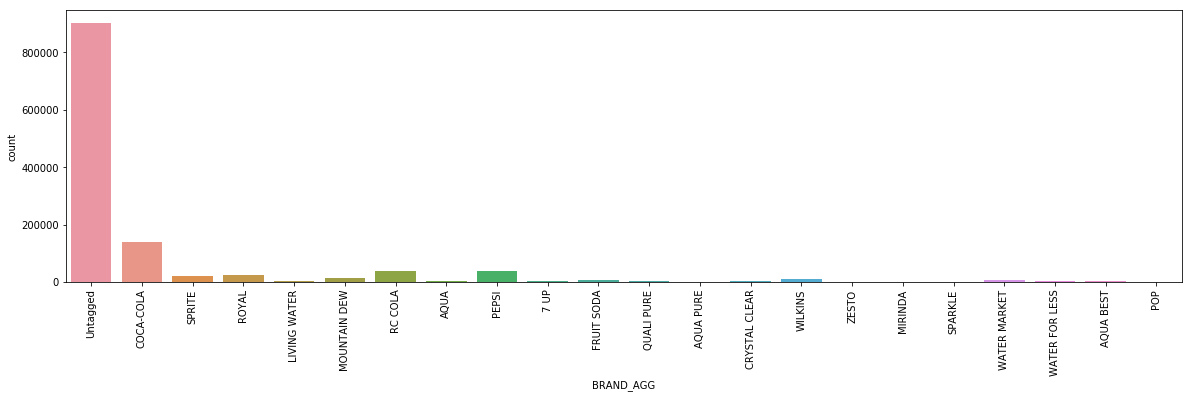

In [10]:
plt.figure(figsize=(20,5))
sns.countplot(data_df['BRAND_AGG'])
plt.xticks(rotation=90)

In [251]:
res1=data_df[data_df["PACKAGE"] == "CAN"].groupby(['PACKAGE','BRAND_AGG'])['Price_Per_Liter_CORR'].mean()
res1

PACKAGE  BRAND_AGG   
CAN      7 UP             65.204678
         COCA-COLA        70.977168
         FRUIT SODA       56.542149
         MIRINDA          65.200391
         MOUNTAIN DEW     63.821471
         PEPSI            57.597379
         RC COLA          58.902539
         ROYAL            70.080552
         SPRITE           70.517662
         Untagged        101.970501
         ZESTO            56.436027
Name: Price_Per_Liter_CORR, dtype: float64

Text(0.5, 1.0, 'The package for the brand of coca-cola ')

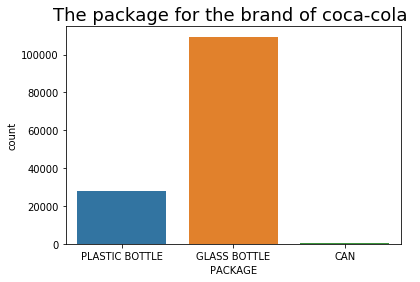

In [268]:
sns.countplot(data_df[data_df['BRAND_AGG']=='COCA-COLA'].PACKAGE)
plt.title("The package for the brand of coca-cola ",fontsize=18)

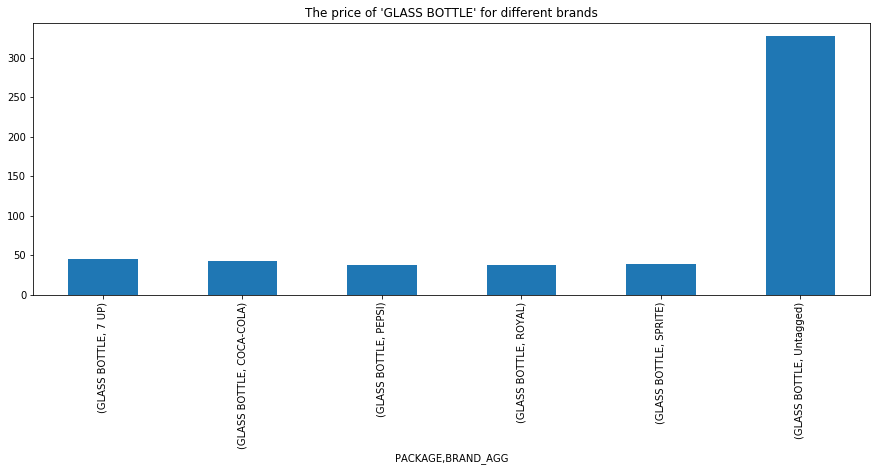

In [276]:
plt.figure(figsize=(15,5))
plt.title("The price of 'GLASS BOTTLE' for different brands")
data_df[(data_df["PACKAGE"] == "GLASS BOTTLE") & (data_df["Unit_Size_CORR"] == 500)].groupby(['PACKAGE','BRAND_AGG'])['Price_Per_Liter_CORR'].mean().plot.bar()

In [277]:
data_df[data_df["PACKAGE"] == "CAN"].Unit_Size_CORR.value_counts()

240.000000     9853
1360.000000    1952
330.000000     1774
140.000000     1028
530.000000      566
155.000000      505
250.000000      440
2900.000000     144
190.000000       88
355.000000       47
210.000000       27
532.000000       24
350.000000       24
237.000000       17
340.000000       11
500.000000        4
473.000000        3
222.000000        3
221.000000        1
453.333333        1
354.000000        1
320.000000        1
98.333333         1
292.222222        1
533.000000        1
25.000000         1
1000.000000       1
1800.000000       1
49.696970         1
120.000000        1
454.444444        1
220.000000        1
160.000000        1
Name: Unit_Size_CORR, dtype: int64

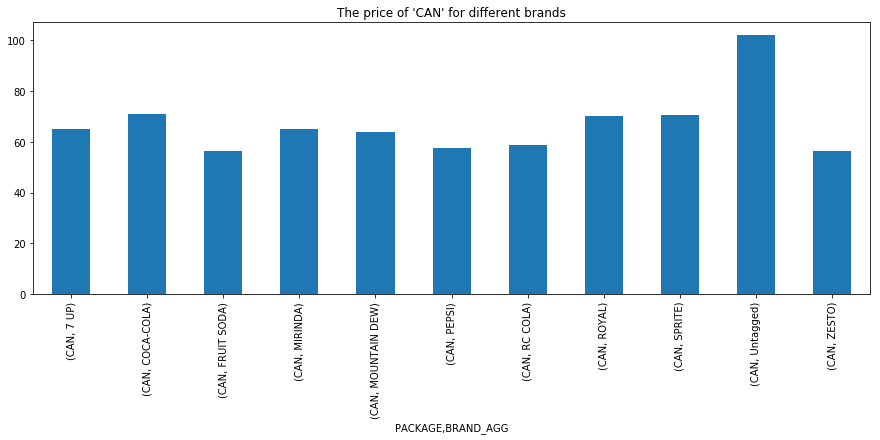

In [279]:
plt.figure(figsize=(15,5))
plt.title("The price of 'CAN' for different brands")
data_df[data_df["PACKAGE"] == "CAN"].groupby(['PACKAGE','BRAND_AGG'])['Price_Per_Liter_CORR'].mean().plot.bar()

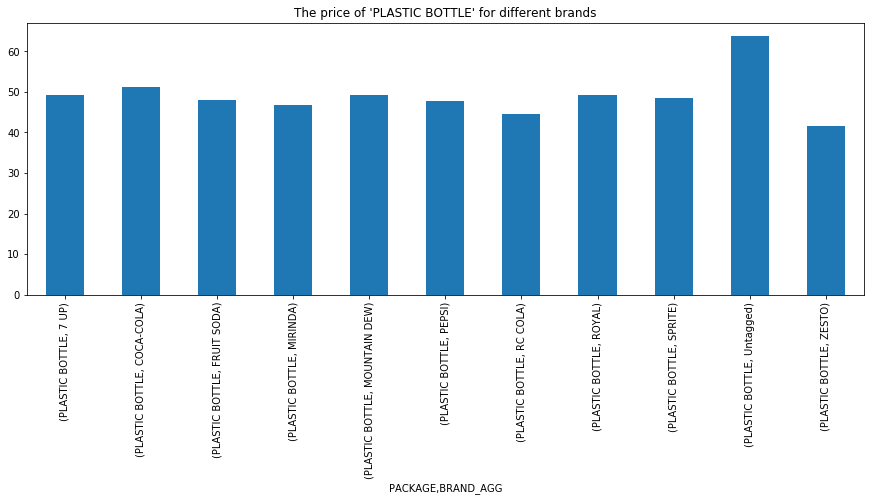

In [274]:
plt.figure(figsize=(15,5))
plt.title("The price of 'PLASTIC BOTTLE' for different brands")
data_df[(data_df["PACKAGE"] == "PLASTIC BOTTLE")& (data_df["Unit_Size_CORR"] == 500)].groupby(['PACKAGE','BRAND_AGG'])['Price_Per_Liter_CORR'].mean().plot.bar()

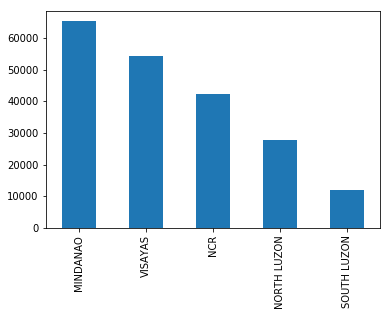

In [177]:
data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola'].DEMOG_REGION.value_counts().plot.bar()

Text(0.5, 1.0, 'Sales of COCA-COLA in different regions')

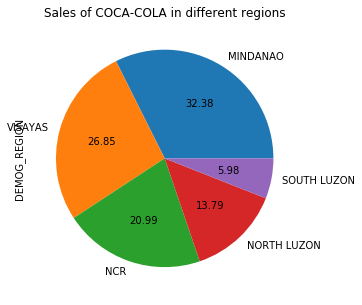

In [176]:
data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola'].DEMOG_REGION.value_counts().plot.pie(figsize=(5,5),autopct='%.2f')
plt.title("Sales of COCA-COLA in different regions")

In [16]:
res2

MINDANAO       65404
VISAYAS        54235
NCR            42392
NORTH LUZON    27855
SOUTH LUZON    12075
Name: DEMOG_REGION, dtype: int64

In [17]:
data_df['MANUFACTURER_AGG'].value_counts()


OTHERS                    258494
Nestle                    253912
Coca-Cola                 201961
PT Torabika               177439
URC                       161096
PepsiCo                    65924
Asiawide Refreshments      46178
Zesto                      29973
Del Monte                  15936
Asia Brewery               10680
Philippine SpringWater      7253
RFM Corp.                   2762
Dole                         992
Fonterra                     578
Name: MANUFACTURER_AGG, dtype: int64

Text(0.5, 1.0, 'Sales of COCA-COLA in different channel')

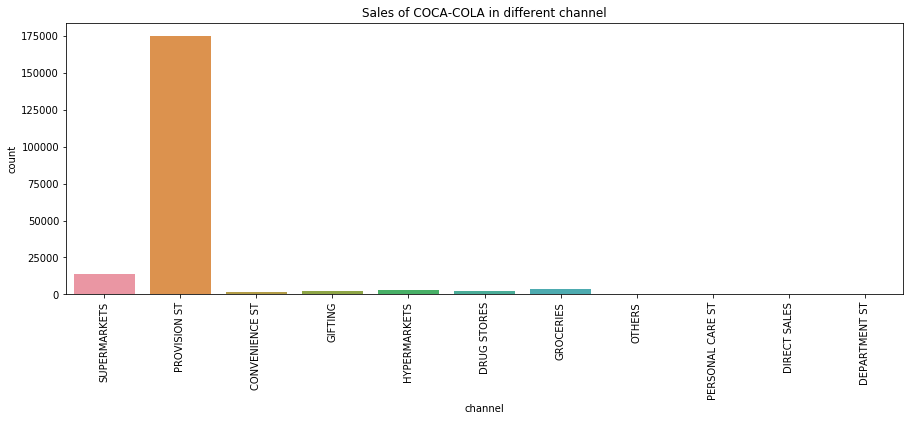

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['channel'])
plt.xticks(rotation=90)
plt.title("Sales of COCA-COLA in different channel")

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['channel'])
plt.xticks(rotation=90)
plt.title("Sales of COCA-COLA in different channel")

Text(0.5, 1.0, 'Sales of DEMOG_STRATA in different regions')

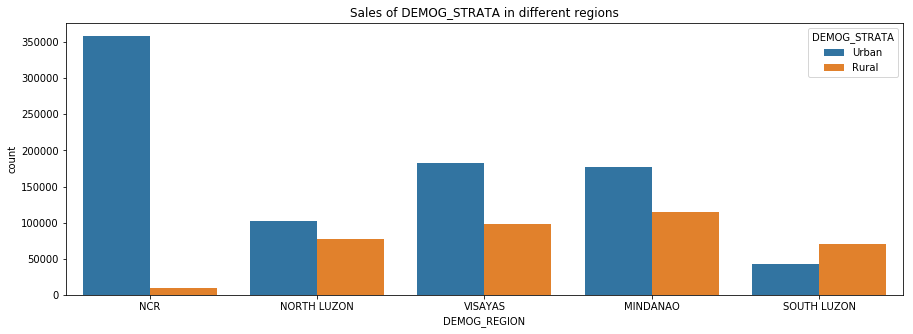

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x=data_df['DEMOG_REGION'], hue=data_df['DEMOG_STRATA'])
plt.title("Sales of DEMOG_STRATA in different regions")

In [20]:
data_df.groupby(['MANUFACTURER_AGG','PACKAGE'])['Price_Per_Liter_CORR'].mean()

MANUFACTURER_AGG        PACKAGE                     
Asia Brewery            BOTTLED WATER                     17.756287
                        CAN                               60.401979
                        DISPENSER                          2.794613
                        GLASS BOTTLE                      55.545470
                        PLASTIC BOTTLE                    57.958572
                        TETRA PACK                        76.000000
Asiawide Refreshments   CAN                               60.772121
                        GLASS BOTTLE                      25.230186
                        PLASTIC BOTTLE                    30.105837
Coca-Cola               BOTTLED WATER                     17.356636
                        CAN                               70.637605
                        DISPENSER                          8.420567
                        DOY PACK                          25.000000
                        FOIL PACK                         32.00

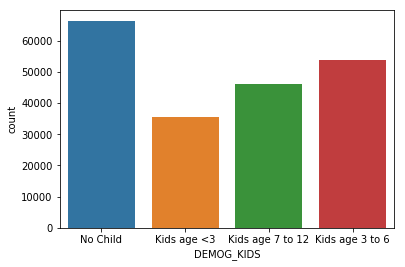

In [21]:
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_KIDS'])

In [22]:
data_df.head()

,seqno,house,weekday,trade,channel,Store,Liters_Bought_CORR,Spend_CORR,Price_Per_Liter_CORR,Unit_Size_CORR,REFID,CAT,MANUFACTURER,BRAND,PACKSIZE,PACKAGE,FLAVOUR,VARIANT1,VARIANT2,SKU_DESC,CW_1Y,CW_2Y,DEMOG_REGION,DEMOG_HHSIZE,DEMOG_HHSEC,DEMOG_HWAGE,DEMOG_KIDS,DEMOG_WORKINGSTATUS,DEMOG_STRATA,DEMOG_LIFESTAGE,1W Rolling Week End,4W Rolling Week End,Units_Bought_CORR,Packs_Bought_CORR,Units_Per_Pack_CORR,MANUFACTURER_AGG,BRAND_AGG
0,1,101006101,1,MT,SUPERMARKETS,Other,0.27,50.0,185.185185,27.0,REFID06202150524077195004000,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,27.5 G (8- W/ 10% MORE CONTENT),SACHET,BROWN / BROWN COFFEE / BROWN COFFEE MIX,JUST RIGHT BLEND COFFEE MIX,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/7/2016,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged
1,2,101006101,2,MT,SUPERMARKETS,Other,0.50,28.0,56.000000,500.0,REFID05902060006002002005000,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/7/2016,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
2,3,101006101,2,MT,SUPERMARKETS,Other,1.80,60.0,33.333333,300.0,REFID06802040083003006000000,SOFTDRINKS,COCA-COLA,COKE,300 ML (COCA-COLA MISMO P10),PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 300 ML (COCA-COLA MI...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/7/2016,2/28/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
3,4,101006101,2,MT,SUPERMARKETS,Other,0.50,28.0,56.000000,500.0,REFID05902060006002002005000,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/21/2016,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
4,5,101006101,2,MT,SUPERMARKETS,Other,0.25,50.0,200.000000,25.0,REFID06202150209061001004000,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,25 G,SACHET,MORE IN 1,REGULAR/CLASSIC,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/28/2016,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged


Text(0.5, 1.0, 'the sales of different packages under the manufactuere of Coca-cola')

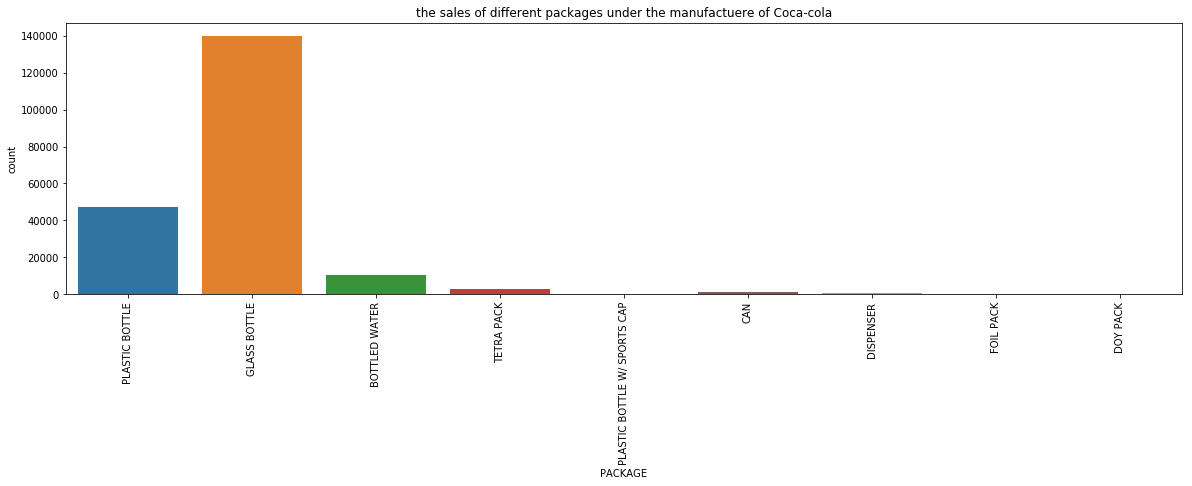

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['PACKAGE'])
plt.xticks(rotation=90)
plt.title("the sales of different packages under the manufactuere of Coca-cola")

In [24]:
data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['CAT'].value_counts()

SOFTDRINKS                        186774
DRINKING WATER/MINERAL WATER       10848
LIQUID / RTD JUICE                  4196
LIQUID / RTD SPORTS / ENERGY D       143
Name: CAT, dtype: int64

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233178 entries, 0 to 1233177
Data columns (total 37 columns):
seqno                   1233178 non-null int64
house                   1233178 non-null int64
weekday                 1233178 non-null int64
trade                   1233178 non-null object
channel                 1233178 non-null object
Store                   1233178 non-null object
Liters_Bought_CORR      1233178 non-null float64
Spend_CORR              1233178 non-null float64
Price_Per_Liter_CORR    1233178 non-null float64
Unit_Size_CORR          1233178 non-null float64
REFID                   1233178 non-null object
CAT                     1233178 non-null object
MANUFACTURER            1233178 non-null object
BRAND                   1233178 non-null object
PACKSIZE                1233178 non-null object
PACKAGE                 1233178 non-null object
FLAVOUR                 1004985 non-null object
VARIANT1                1233178 non-null object
VARIANT2              

Text(0.5, 1.0, 'which DEMOG_KIDS buy Coca-Cola most?')

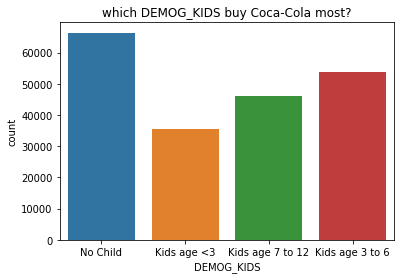

In [191]:
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_KIDS'])
plt.title("which DEMOG_KIDS buy Coca-Cola most?")

Text(0.5, 1.0, 'which region has the most population with no child?')

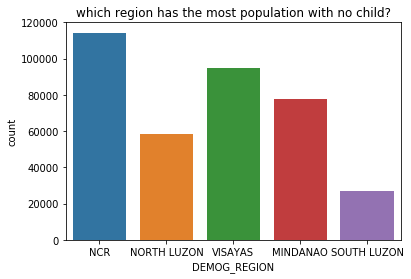

In [193]:
sns.countplot(data_df[data_df['DEMOG_KIDS'] == 'No Child']['DEMOG_REGION'])
plt.title("which region has the most population with no child?")

Text(0.5, 1.0, "Which region has the most number of 'HH Size 3-4' or 'HH Size 5-6'")

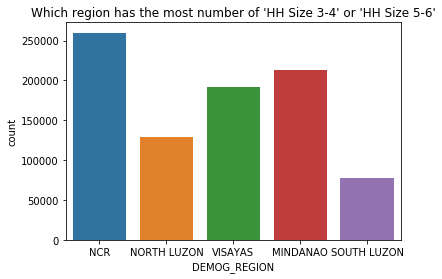

In [27]:
sns.countplot(data_df[(data_df['DEMOG_HHSIZE'] == 'HH Size 3-4') |(data_df['DEMOG_HHSIZE'] == 'HH Size 5-6')]['DEMOG_REGION'])
plt.title("Which region has the most number of 'HH Size 3-4' or 'HH Size 5-6'")

Text(0.5, 1.0, 'which DEMOG_HHSEC buys the coca-cola most?')

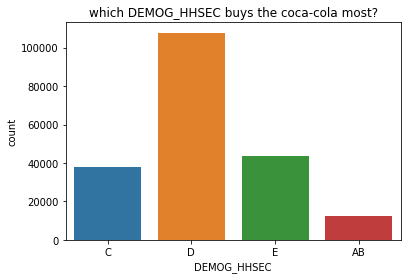

In [28]:
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_HHSEC'])
plt.title("which DEMOG_HHSEC buys the coca-cola most?")

Text(0.5, 1.0, 'which region has the most DEMOG_REGION:D?')

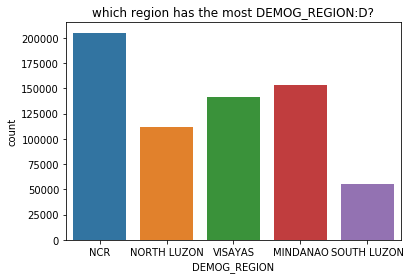

In [29]:
sns.countplot(data_df[data_df['DEMOG_HHSEC'] == 'D']['DEMOG_REGION'])
plt.title("which region has the most DEMOG_REGION:D?")

### analysis the sales change of coca-cola from 2016 to 2019

In [31]:
data_df["1W Rolling Week End"] = pd.to_datetime(data_df["1W Rolling Week End"])

In [32]:
data_df['DEMOG_REGION'].value_counts()

NCR            368173
MINDANAO       290708
VISAYAS        281547
NORTH LUZON    179606
SOUTH LUZON    113144
Name: DEMOG_REGION, dtype: int64

In [33]:
data_df['1W Rolling Week End'].dt.year.value_counts()

2017    410332
2016    408206
2018    386242
2019     28398
Name: 1W Rolling Week End, dtype: int64

In [35]:
data_df[data_df['MANUFACTURER'] == 'COCA-COLA']

,seqno,house,weekday,trade,channel,Store,Liters_Bought_CORR,Spend_CORR,Price_Per_Liter_CORR,Unit_Size_CORR,REFID,CAT,MANUFACTURER,BRAND,PACKSIZE,PACKAGE,FLAVOUR,VARIANT1,VARIANT2,SKU_DESC,CW_1Y,CW_2Y,DEMOG_REGION,DEMOG_HHSIZE,DEMOG_HHSEC,DEMOG_HWAGE,DEMOG_KIDS,DEMOG_WORKINGSTATUS,DEMOG_STRATA,DEMOG_LIFESTAGE,1W Rolling Week End,4W Rolling Week End,Units_Bought_CORR,Packs_Bought_CORR,Units_Per_Pack_CORR,MANUFACTURER_AGG,BRAND_AGG
2,3,101006101,2,MT,SUPERMARKETS,Other,1.800,60.0,33.333333,300.0,REFID06802040083003006000000,SOFTDRINKS,COCA-COLA,COKE,300 ML (COCA-COLA MISMO P10),PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 300 ML (COCA-COLA MI...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-07,2/28/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
5,6,101006101,2,MT,SUPERMARKETS,Other,1.500,54.0,36.000000,250.0,REFID06802040095003006000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-28,2/28/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
6,7,101006101,4,MT,SUPERMARKETS,Other,1.500,60.0,40.000000,250.0,REFID06802040095003006000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-03-06,3/27/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
7,8,101006101,2,MT,SUPERMARKETS,Other,0.500,20.0,40.000000,250.0,REFID06802100105003027000000,SOFTDRINKS,COCA-COLA,SPRITE,250 ML (SPRITE MISMO P10),PLASTIC BOTTLE,LEMON-LIME / LEMON + LIME,,,SOFTDRINKS COCA-COLA SPRITE 250 ML (SPRITE MIS...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-03-20,3/27/2016,2.0,1.0,2.0,Coca-Cola,SPRITE
9,10,101006101,2,MT,SUPERMARKETS,Other,1.000,40.0,40.000000,250.0,REFID06802040095003006000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-03-27,3/27/2016,4.0,1.0,4.0,Coca-Cola,COCA-COLA
10,11,101006101,4,MT,SUPERMARKETS,Other,1.500,60.0,40.000000,250.0,REFID06802040095003006000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-04-03,4/24/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
12,13,101006101,2,MT,SUPERMARKETS,Other,0.750,30.0,40.000000,250.0,REFID06802040095003006000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-04-17,4/24/2016,3.0,1.0,3.0,Coca-Cola,COCA-COLA
17,18,101006101,4,MT,SUPERMARKETS,Other,1.500,60.0,40.000000,250.0,REFID06802040095003006000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-04-24,4/24/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
24,25,101006101,6,MT,SUPERMARKETS,Other,0.750,30.0,40.000000,250.0,REFID06802040095003006000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-05-15,5/22/2016,3.0,1.0,3.0,Coca-Cola,COCA-COLA
36,37,101006101,6,MT,SUPERMARKETS,Other,0.500,22.0,44.000000,250.0,REFID46402960160002005153001,LIQUID / RTD JUICE,COCA-COLA,MINUTE MAID,250 ML,PLASTIC BOTTLE,ORANGE WITH REAL JUICE (FRESH),JUICE DRINK,READY-TO-DRINK,LIQUID / RTD JUICE COCA-COLA MINUTE MAID 250 M...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-07-03,7/17/2016,2.0,1.0,2.0,Coca-Cola

In [34]:
df_coca = data_df[data_df['MANUFACTURER'] == 'COCA-COLA']

In [35]:
df_coca.groupby(['DEMOG_REGION']).agg('count')

,seqno,house,weekday,trade,channel,Store,Liters_Bought_CORR,Spend_CORR,Price_Per_Liter_CORR,Unit_Size_CORR,REFID,CAT,MANUFACTURER,BRAND,PACKSIZE,PACKAGE,FLAVOUR,VARIANT1,VARIANT2,SKU_DESC,CW_1Y,CW_2Y,DEMOG_HHSIZE,DEMOG_HHSEC,DEMOG_HWAGE,DEMOG_KIDS,DEMOG_WORKINGSTATUS,DEMOG_STRATA,DEMOG_LIFESTAGE,1W Rolling Week End,4W Rolling Week End,Units_Bought_CORR,Packs_Bought_CORR,Units_Per_Pack_CORR,MANUFACTURER_AGG,BRAND_AGG
DEMOG_REGION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MINDANAO,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,64872,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379
NCR,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,36406,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336
NORTH LUZON,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,25663,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837
SOUTH LUZON,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,10862,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062
VISAYAS,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,53270,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204


In [36]:
data_df['1W Rolling Week End'].value_counts().shape

(156,)

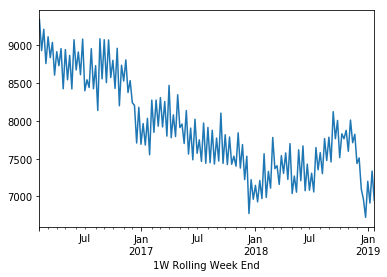

In [37]:
data_df.groupby(['1W Rolling Week End']).agg('count')['seqno'].plot.line()

In [38]:
df_temp = data_df.groupby(['DEMOG_REGION', '1W Rolling Week End']).agg('count')['seqno'].unstack()

In [39]:
df_temp

1W Rolling Week End,2016-02-07 00:00:00,2016-02-14 00:00:00,2016-02-21 00:00:00,2016-02-28 00:00:00,2016-03-06 00:00:00,2016-03-13 00:00:00,2016-03-20 00:00:00,2016-03-27 00:00:00,2016-04-03 00:00:00,2016-04-10 00:00:00,2016-04-17 00:00:00,2016-04-24 00:00:00,2016-05-01 00:00:00,2016-05-08 00:00:00,2016-05-15 00:00:00,2016-05-22 00:00:00,2016-05-29 00:00:00,2016-06-05 00:00:00,2016-06-12 00:00:00,2016-06-19 00:00:00,...,2018-09-16 00:00:00,2018-09-23 00:00:00,2018-09-30 00:00:00,2018-10-07 00:00:00,2018-10-14 00:00:00,2018-10-21 00:00:00,2018-10-28 00:00:00,2018-11-04 00:00:00,2018-11-11 00:00:00,2018-11-18 00:00:00,2018-11-25 00:00:00,2018-12-02 00:00:00,2018-12-09 00:00:00,2018-12-16 00:00:00,2018-12-23 00:00:00,2018-12-30 00:00:00,2019-01-06 00:00:00,2019-01-13 00:00:00,2019-01-20 00:00:00,2019-01-27 00:00:00
DEMOG_REGION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MINDANAO,2209,2108,2203,2052,2124,2048,2148,1944,2063,2056,2044,1949,2189,2011,2186,2028,2086,2071,2061,1988,...,1906,1896,1924,1828,1852,1821,1863,1799,1873,1699,1822,1710,1753,1660,1654,1576,1731,1601,1754,1643
NCR,2722,2609,2777,2676,2791,2828,2707,2616,2763,2734,2787,2647,2632,2571,2582,2513,2648,2602,2654,2731,...,2371,2261,2298,2245,2252,2349,2245,2285,2362,2366,2278,2289,2174,2104,1882,1923,1916,2066,2135,2079
NORTH LUZON,1422,1389,1308,1281,1329,1350,1348,1270,1277,1264,1294,1172,1308,1264,1223,1164,1341,1228,1259,1178,...,1122,1049,1128,979,1102,1043,1121,1024,1107,1064,1114,1041,1122,978,965,896,1036,974,1015,982
SOUTH LUZON,908,882,859,776,896,844,830,809,803,766,820,704,817,742,822,751,805,787,857,816,...,753,736,752,677,721,712,711,676,785,730,723,668,705,654,696,617,688,638,655,627
VISAYAS,2079,1942,2065,1974,1973,1767,2006,1967,2010,1910,2012,1953,1998,1956,2054,1967,2194,1987,2081,1898,...,1970,1822,1904,1784,1902,1839,1935,1814,1884,1852,1886,1728,1756,1702,1764,1712,1831,1634,1777,1616


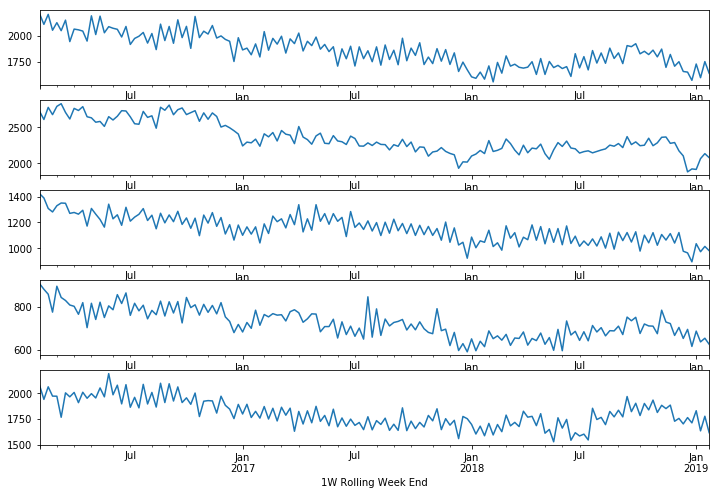

In [40]:
fig, ax = plt.subplots(5, figsize= (12, 8))
df_temp.iloc[0].plot.line(ax= ax[0])
df_temp.iloc[1].plot.line(ax= ax[1])
df_temp.iloc[2].plot.line(ax= ax[2])
df_temp.iloc[3].plot.line(ax= ax[3])
df_temp.iloc[4].plot.line(ax= ax[4])

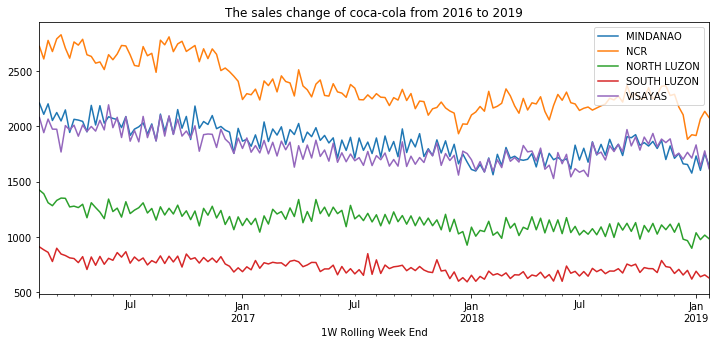

In [41]:
plt.figure(figsize=(12,5))
df_temp.iloc[0].plot.line()
df_temp.iloc[1].plot.line()
df_temp.iloc[2].plot.line()
df_temp.iloc[3].plot.line()
df_temp.iloc[4].plot.line()
label = ["MINDANAO", "NCR",'NORTH LUZON','SOUTH LUZON','VISAYAS'] 
plt.title("The sales change of coca-cola from 2016 to 2019")
plt.legend(label)

In [42]:
data_df.head()

,seqno,house,weekday,trade,channel,Store,Liters_Bought_CORR,Spend_CORR,Price_Per_Liter_CORR,Unit_Size_CORR,REFID,CAT,MANUFACTURER,BRAND,PACKSIZE,PACKAGE,FLAVOUR,VARIANT1,VARIANT2,SKU_DESC,CW_1Y,CW_2Y,DEMOG_REGION,DEMOG_HHSIZE,DEMOG_HHSEC,DEMOG_HWAGE,DEMOG_KIDS,DEMOG_WORKINGSTATUS,DEMOG_STRATA,DEMOG_LIFESTAGE,1W Rolling Week End,4W Rolling Week End,Units_Bought_CORR,Packs_Bought_CORR,Units_Per_Pack_CORR,MANUFACTURER_AGG,BRAND_AGG
0,1,101006101,1,MT,SUPERMARKETS,Other,0.27,50.0,185.185185,27.0,REFID06202150524077195004000,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,27.5 G (8- W/ 10% MORE CONTENT),SACHET,BROWN / BROWN COFFEE / BROWN COFFEE MIX,JUST RIGHT BLEND COFFEE MIX,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-07,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged
1,2,101006101,2,MT,SUPERMARKETS,Other,0.50,28.0,56.000000,500.0,REFID05902060006002002005000,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-07,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
2,3,101006101,2,MT,SUPERMARKETS,Other,1.80,60.0,33.333333,300.0,REFID06802040083003006000000,SOFTDRINKS,COCA-COLA,COKE,300 ML (COCA-COLA MISMO P10),PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 300 ML (COCA-COLA MI...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-07,2/28/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
3,4,101006101,2,MT,SUPERMARKETS,Other,0.50,28.0,56.000000,500.0,REFID05902060006002002005000,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-21,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
4,5,101006101,2,MT,SUPERMARKETS,Other,0.25,50.0,200.000000,25.0,REFID06202150209061001004000,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,25 G,SACHET,MORE IN 1,REGULAR/CLASSIC,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2016-02-28,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged


### analysis the coca-cola percent compared with the market

In [49]:
data_df["CAT"].value_counts()

INSTANT COFFEE                    594814
SOFTDRINKS                        290650
DRINKING WATER/MINERAL WATER      240755
LIQUID / RTD JUICE                 59754
UHT MILK                           35385
LIQUID / RTD SPORTS / ENERGY D     11411
POWDER SPORTS / ENERGY DRINK         409
Name: CAT, dtype: int64

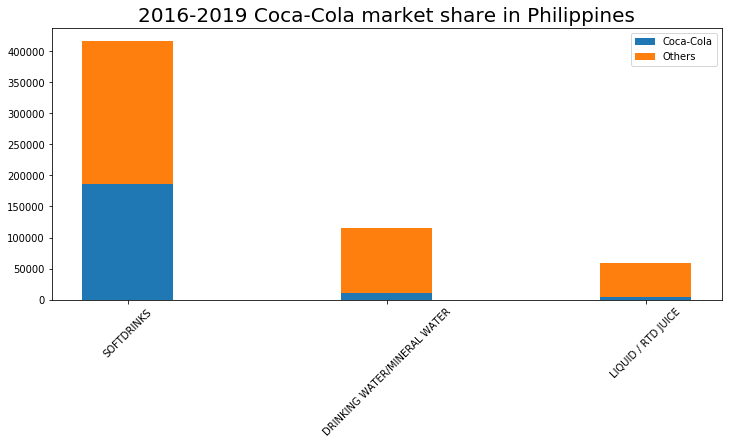

In [119]:
plt.figure(figsize=(12,5))
w=0.35
new_df = data_df[(data_df['CAT']=='SOFTDRINKS') | (data_df['CAT']=='DRINKING WATER/MINERAL WATER') | (data_df['CAT']=='LIQUID / RTD JUICE')]
x=['SOFTDRINKS','DRINKING WATER/MINERAL WATER','LIQUID / RTD JUICE']
a=new_df[new_df['MANUFACTURER_AGG']=='Coca-Cola']['CAT'].value_counts()
b=new_df[new_df['MANUFACTURER_AGG']!='Coca-Cola']['CAT'].value_counts()
plt.bar(x,a,label='coca-cola',width = 0.35)
plt.bar(x,b, bottom=a,label='others',width = 0.35)
plt.title("2016-2019 Coca-Cola market share in Philippines",fontsize=20)
plt.xticks(rotation=45)
label=['Coca-Cola','Others']
plt.legend(label)
plt.show()

In [111]:
new_df[new_df['MANUFACTURER_AGG']=='Coca-Cola']['CAT'].value_counts()

SOFTDRINKS                      186774
DRINKING WATER/MINERAL WATER     10848
LIQUID / RTD JUICE                4196
Name: CAT, dtype: int64

In [112]:
new_df[new_df['MANUFACTURER_AGG']!='Coca-Cola']['CAT'].value_counts()

DRINKING WATER/MINERAL WATER    229907
SOFTDRINKS                      103876
LIQUID / RTD JUICE               55558
Name: CAT, dtype: int64

In [113]:
186774/(186774+103876)

0.6426079477034233

Text(0.5, 1.0, 'which DEMOG_HWAGE buys the coca-cola most?')

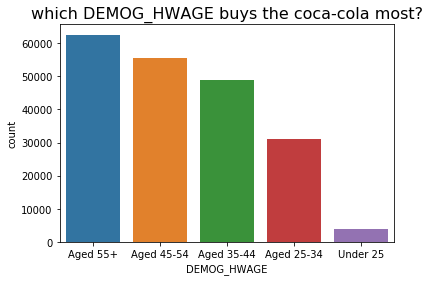

In [129]:
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_HWAGE'])
plt.title("which DEMOG_HWAGE buys the coca-cola most?",fontsize=16)

Text(0.5, 1.0, "Which region has the most number of 'Aged 55+'&'45-54'&'35-44'")

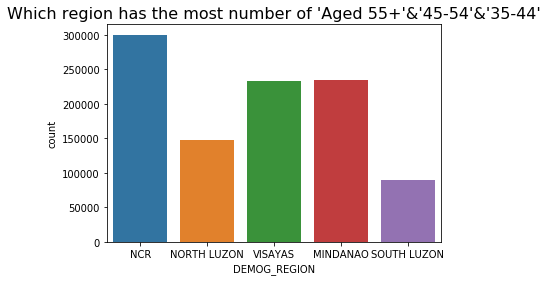

In [140]:
sns.countplot(data_df[(data_df['DEMOG_HWAGE'] == 'Aged 55+') | (data_df['DEMOG_HWAGE'] == 'Aged 45-54')| (data_df['DEMOG_HWAGE'] == 'Aged 35-44')]['DEMOG_REGION'])
plt.title("Which region has the most number of 'Aged 55+'&'45-54'&'35-44'",fontsize=16)

Text(0.5, 1.0, 'which DEMOG_WORKINGSTATUS buys the coca-cola most?')

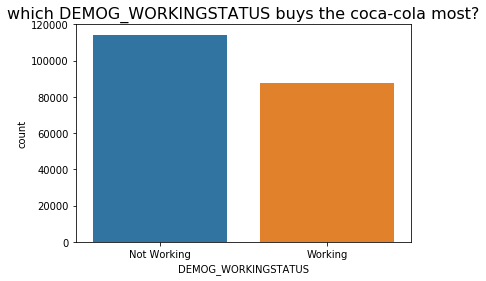

In [145]:
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_WORKINGSTATUS'])
plt.title("which DEMOG_WORKINGSTATUS buys the coca-cola most?",fontsize=16)

Text(0.5, 1.0, 'which region has the most population not working?')

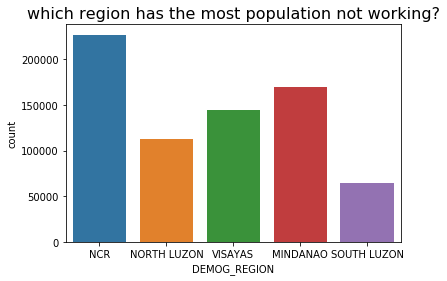

In [146]:
sns.countplot(data_df[data_df['DEMOG_WORKINGSTATUS'] == 'Not Working']['DEMOG_REGION'])
plt.title("which region has the most population not working?",fontsize=16)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

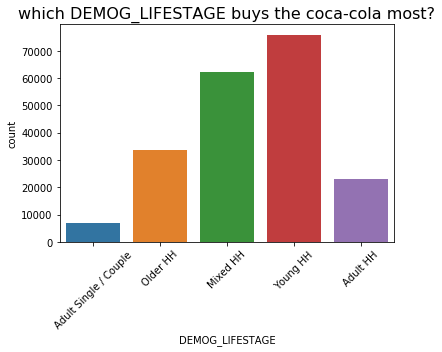

In [150]:
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_LIFESTAGE'])
plt.title("which DEMOG_LIFESTAGE buys the coca-cola most?",fontsize=16)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'which region has the most population of Young HH?')

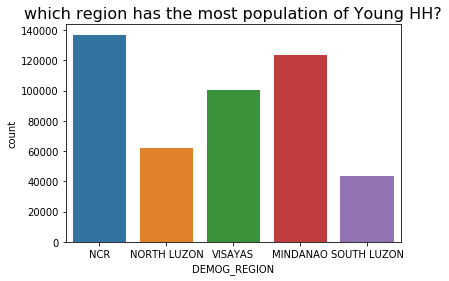

In [153]:
sns.countplot(data_df[data_df['DEMOG_LIFESTAGE'] =='Young HH']['DEMOG_REGION'])
plt.title("which region has the most population of Young HH?",fontsize=16)

* the NCR has the most sales for coca cola

Text(0.5, 1.0, 'The main sales channel in NCR')

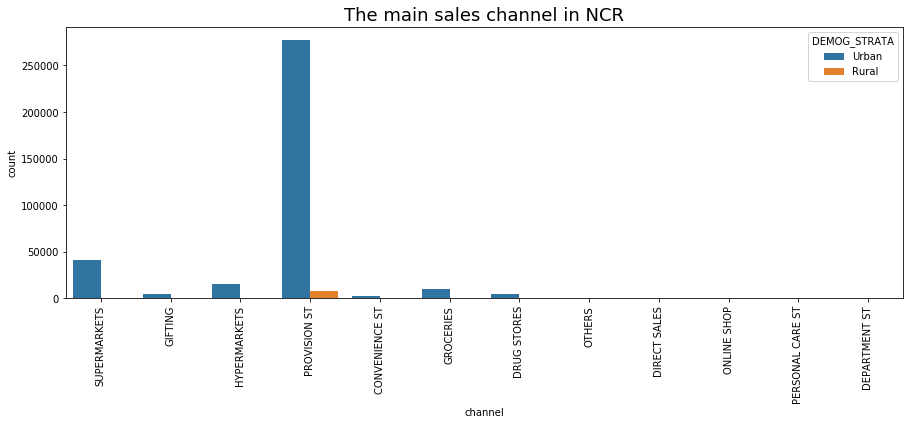

In [214]:
plt.figure(figsize=(15,5))
sns.countplot(x=data_df[data_df['DEMOG_REGION']=='NCR']['channel'], hue=data_df['DEMOG_STRATA'])
plt.xticks(rotation=90)
plt.title('The main sales channel in NCR',fontsize=18)

### analysis pack_

Text(0.5, 1.0, 'Analysis of Packs_Bought_CORR for Coca-Cola')

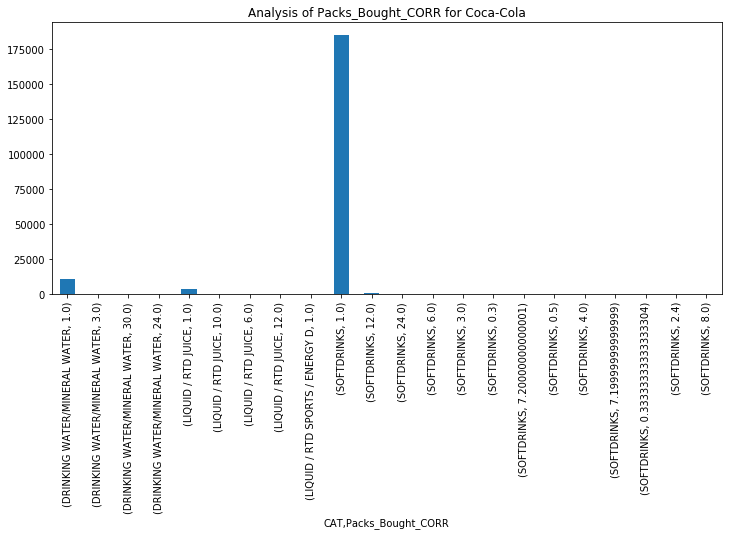

In [218]:
plt.figure(figsize=(12,5))
data_df[data_df['MANUFACTURER_AGG']=='Coca-Cola'].groupby('CAT')['Packs_Bought_CORR'].value_counts().plot.bar()
plt.title("Analysis of Packs_Bought_CORR for Coca-Cola")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

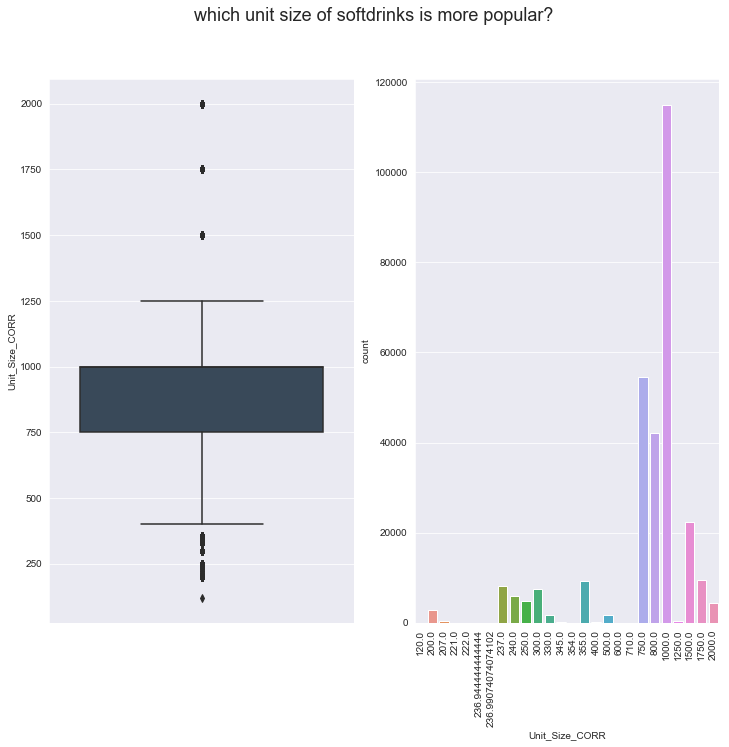

In [322]:
# plt.figure(figsize=(12,10))
fig, ax =plt.subplots(1,2,figsize=(12,10))
sns.set_style("darkgrid")
flatui = ["#34495e"]
fig.suptitle('which unit size of softdrinks is more popular?', fontsize=18)
sns.boxplot(y=data_df[data_df['CAT']=='SOFTDRINKS']['Unit_Size_CORR'], orient='v',ax=ax[0],palette= flatui)
sns.countplot(data_df[data_df['CAT']=='SOFTDRINKS']['Unit_Size_CORR'], orient='v',ax=ax[1])
plt.xticks(rotation=90)

In [411]:
data_df[data_df['MANUFACTURER_AGG']=='Coca-Cola'].groupby('CAT')['PACKAGE'].value_counts()

CAT                             PACKAGE                     
DRINKING WATER/MINERAL WATER    BOTTLED WATER                    10263
                                DISPENSER                          585
LIQUID / RTD JUICE              TETRA PACK                        2875
                                PLASTIC BOTTLE                    1303
                                GLASS BOTTLE                        12
                                FOIL PACK                            5
                                DOY PACK                             1
LIQUID / RTD SPORTS / ENERGY D  PLASTIC BOTTLE                     126
                                PLASTIC BOTTLE W/ SPORTS CAP        17
SOFTDRINKS                      GLASS BOTTLE                    139985
                                PLASTIC BOTTLE                   45695
                                CAN                               1094
Name: PACKAGE, dtype: int64

In [410]:
cc_df=data_df[data_df['MANUFACTURER_AGG']=='Coca-Cola']

GLASS BOTTLE                    139997
PLASTIC BOTTLE                   47124
BOTTLED WATER                    10263
TETRA PACK                        2875
CAN                               1094
DISPENSER                          585
PLASTIC BOTTLE W/ SPORTS CAP        17
FOIL PACK                            5
DOY PACK                             1
Name: PACKAGE, dtype: int64

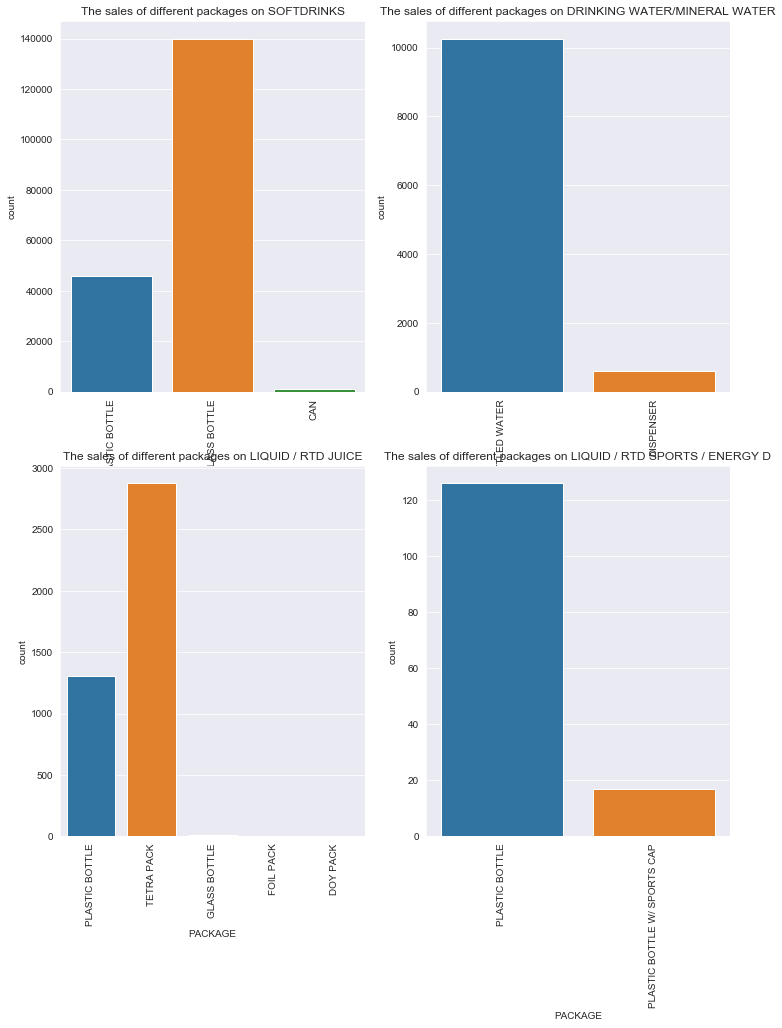

In [424]:
fig, ax =plt.subplots(2,2,figsize=(12,15))
sns.set_style("darkgrid")
flatui = ["#34495e"]
# fig.suptitle('The sales of different packages for categories of COCA-COLA', fontsize=18)
ax1=sns.countplot(cc_df[cc_df['CAT']=='SOFTDRINKS']['PACKAGE'], orient='v',ax=ax[0,0])
ax2=sns.countplot(cc_df[cc_df['CAT']=='DRINKING WATER/MINERAL WATER']['PACKAGE'], orient='v',ax=ax[0,1])
ax3=sns.countplot(cc_df[cc_df['CAT']=='LIQUID / RTD JUICE']['PACKAGE'], orient='v',ax=ax[1,0])
ax4=sns.countplot(cc_df[cc_df['CAT']=='LIQUID / RTD SPORTS / ENERGY D']['PACKAGE'], orient='v',ax=ax[1,1])

ax1.title.set_text('The sales of different packages on SOFTDRINKS')
ax2.title.set_text('The sales of different packages on DRINKING WATER/MINERAL WATER')
ax3.title.set_text('The sales of different packages on LIQUID / RTD JUICE')
ax4.title.set_text('The sales of different packages on LIQUID / RTD SPORTS / ENERGY D')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

### the sales situation of each brand distributed in one channel

In [162]:
data_df[data_df['MANUFACTURER_AGG'] == "Coca-Cola"].groupby(['channel', 'BRAND_AGG'])['seqno'].count().head()

channel         BRAND_AGG
CONVENIENCE ST  COCA-COLA    562
                ROYAL        113
                SPARKLE        2
                SPRITE       141
                Untagged     140
Name: seqno, dtype: int64

* each brand sales under coca cola company

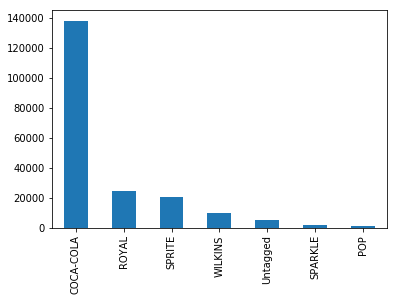

In [163]:
data_df[data_df['MANUFACTURER_AGG'] == "Coca-Cola"].BRAND_AGG.value_counts().plot.bar()

### analysis the p-value

In [166]:
# analysis the p-value for brand_agg and channel
df_cc= data_df[data_df['MANUFACTURER_AGG'] == "Coca-Cola"]
contingency_table = pd.crosstab(
    df_cc['channel'],
    df_cc['BRAND_AGG'],
    margins = True
)
contingency_table

BRAND_AGG,COCA-COLA,POP,ROYAL,SPARKLE,SPRITE,Untagged,WILKINS,All
channel,,,,,,,,
CONVENIENCE ST,562,0,113,2,141,140,414,1372
DEPARTMENT ST,1,0,0,0,0,0,0,1
DIRECT SALES,4,0,1,0,2,1,1,9
DRUG STORES,465,0,102,0,96,174,1694,2531
GIFTING,1052,3,292,22,298,262,367,2296
GROCERIES,1494,7,380,10,625,146,759,3421
HYPERMARKETS,1009,0,319,0,357,328,717,2730
OTHERS,198,0,54,92,68,21,166,599
PERSONAL CARE ST,2,0,1,0,0,0,2,5


In [169]:
# Getting the p value for channel and brand
f_obs = np.array([contingency_table.iloc[0][0:7].values,
                  contingency_table.iloc[1][0:7].values,
                 contingency_table.iloc[2][0:7].values,
                 contingency_table.iloc[3][0:7].values,
                 contingency_table.iloc[4][0:7].values,
                 contingency_table.iloc[5][0:7].values,
                 contingency_table.iloc[6][0:7].values,
                 contingency_table.iloc[7][0:7].values,
                 contingency_table.iloc[8][0:7].values,
                 contingency_table.iloc[9][0:7].values,
                 contingency_table.iloc[10][0:7].values])
f_obs
chi2_contingency(f_obs)[1]

0.0

In [183]:
# analysis the p-value for manufacturer_agg and channel
contingency_table = pd.crosstab(
    data_df['channel'],
    data_df['MANUFACTURER_AGG'],
    margins = True
)
contingency_table

MANUFACTURER_AGG,Asia Brewery,Asiawide Refreshments,Coca-Cola,Del Monte,Dole,Fonterra,Nestle,OTHERS,PT Torabika,PepsiCo,Philippine SpringWater,RFM Corp.,URC,Zesto,All
channel,,,,,,,,,,,,,,,
CONVENIENCE ST,298,76,1372,361,8,8,798,721,211,651,325,51,329,229,5438
DEPARTMENT ST,9,0,1,0,0,0,6,4,0,1,4,0,2,0,27
DIRECT SALES,1,1,9,1,0,0,20,1765,3,2,0,1,7,1,1811
DRUG STORES,1848,8,2531,427,82,21,2641,1838,545,637,559,70,582,657,12446
GIFTING,182,144,2296,565,67,9,4228,3309,922,730,207,117,1184,1055,15015
GROCERIES,616,122,3421,1028,31,6,10462,1940,5927,921,432,121,7084,758,32869
HYPERMARKETS,721,117,2730,1744,74,88,6268,2989,2714,1427,215,399,2275,999,22760
ONLINE SHOP,0,0,0,0,0,0,13,7,0,0,0,1,0,0,21
OTHERS,30,76,599,73,5,1,549,216,179,332,100,7,261,51,2479


In [186]:
f_obs = np.array([contingency_table.iloc[0][0:13].values,
                  contingency_table.iloc[1][0:13].values,
                 contingency_table.iloc[2][0:13].values,
                 contingency_table.iloc[3][0:13].values,
                 contingency_table.iloc[4][0:13].values,
                 contingency_table.iloc[5][0:13].values,
                 contingency_table.iloc[6][0:13].values,
                 contingency_table.iloc[7][0:13].values,
                 contingency_table.iloc[8][0:13].values,
                 contingency_table.iloc[9][0:13].values,
                 contingency_table.iloc[10][0:13].values])
f_obs
chi2_contingency(f_obs)[1]

0.0

In [187]:
# analysis the p-value for MANUFACTURER_AGG and trade
contingency_table = pd.crosstab(
    data_df['trade'],
    data_df['MANUFACTURER_AGG'],
    margins = True
)
contingency_table

MANUFACTURER_AGG,Asia Brewery,Asiawide Refreshments,Coca-Cola,Del Monte,Dole,Fonterra,Nestle,OTHERS,PT Torabika,PepsiCo,Philippine SpringWater,RFM Corp.,URC,Zesto,All
trade,,,,,,,,,,,,,,,
MT,5632,511,20480,10188,808,550,50320,21189,19223,8605,3322,2270,20849,7354,171301
Not Specified,3,0,1,0,0,0,0,13,0,3,0,0,1,0,21
TT,5045,45667,181480,5748,184,28,203592,237292,158216,57316,3931,492,140246,22619,1061856
All,10680,46178,201961,15936,992,578,253912,258494,177439,65924,7253,2762,161096,29973,1233178


In [188]:
f_obs = np.array([contingency_table.iloc[0][0:13].values,
                  contingency_table.iloc[1][0:13].values,
                 contingency_table.iloc[2][0:13].values,
                 contingency_table.iloc[3][0:13].values])
f_obs
chi2_contingency(f_obs)[1]

0.0